K-means: clustering (agrupamento)  aprendizado não supervisionado, ou seja, dados sem classificação, que procura K grupos de afinidade no conjunto de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


Iris Flower DATASET: https://www.kaggle.com/arshid/iris-flower-dataset

In [2]:
df = pd.read_csv('../datasets/iris.csv')
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

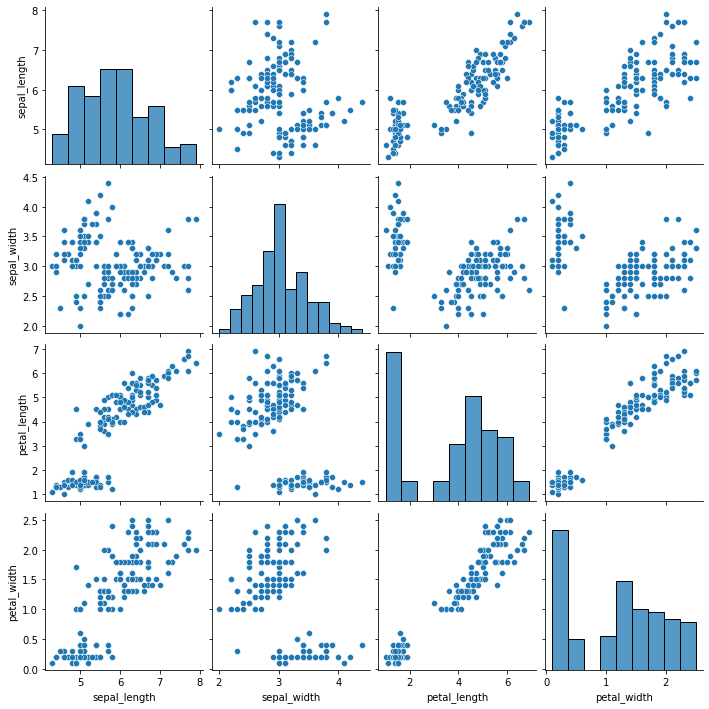

In [3]:
sb.pairplot(df) # dispersão entre as colunas de dados, sem a coluna de classificação SPECIES

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Mudando o nome da coluna species para target

In [5]:
df.rename(columns={'species': 'target'}, inplace=True) # inplace = True não cria novo dataframe, altera o atual
db = df.copy() # mantenho db como cópia de df completo
df


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

db['target_encoded'] = encoder.fit_transform(db['target'])

print(encoder.classes_)

db.head(52)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width,target,target_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


Remover do dataframe a coluna target, pois já contém a classificação. A ideia é rodar o k-means para ele fazer o agrupamento e comparar com a classificação já existente. Vamos criar um array para as features X

In [24]:
X = np.array(db.drop(columns=['target','target_encoded'], axis=1)) # cria array numpy a partir do dataframe, removendo a coluna 'target'. axis = 1 informa que target é coluna e não linha

In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Importar KMeans, da lib scikt-Learn

In [27]:
from sklearn.cluster import KMeans

In [28]:
db.describe(include='object') # Confirma quantas classes tem - neste caso já sabemos previamente (UNIQUE)

,target
count,150
unique,3
top,Iris-versicolor
freq,50


In [29]:
kmeans = KMeans(n_clusters=3, random_state=10) # random state = 0 permite a reprodutibilidade dos testes a cada execução

Treinar o algoritmo KMeans, com o dataset

In [30]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=10)

Visualizar os grupos identificados com labels_

In [31]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Comparar as classes identificadas com as existentes no DF original. Vamos criar uma coluna adicional no dataframe

In [32]:
db['Kmeans-target'] = kmeans.labels_

In [33]:
db

,sepal_length,sepal_width,petal_length,petal_width,target,target_encoded,Kmeans-target
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


Exibindo a dispersão original e a encontrada, com a identificação das classes

C:\Users\josen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


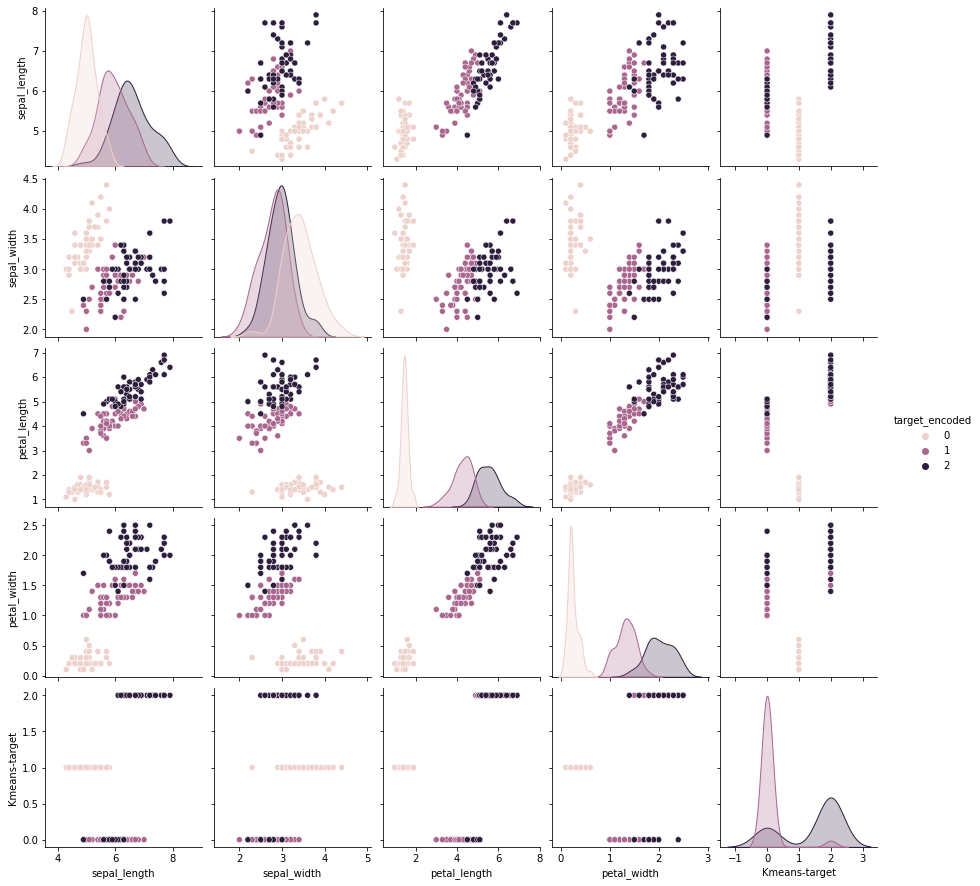

In [37]:
sb.pairplot(db, hue='target_encoded')

C:\Users\josen\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


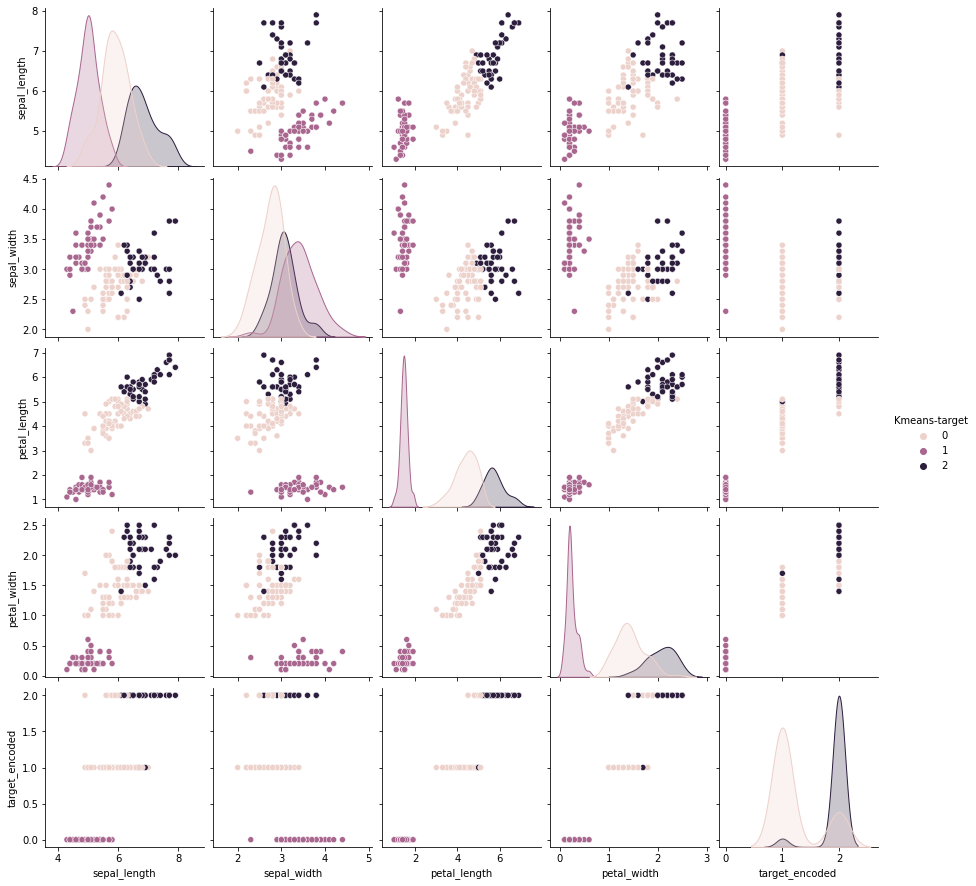

In [36]:
sb.pairplot(db, hue='Kmeans-target')

Comparando os dois conjuntos de gráficos acima, percebe-se que a dispersão resultante do agrupamento K-means é satisfatória quando comparada à classificação original do dataset na coluna species=target.